In [11]:
import time
from IPython.display import clear_output
import numpy    as np
import pandas   as pd
import seaborn  as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import sklearn  as skl
from numpy import asarray

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline      
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config

set_config(display='diagram') # Useful for display the pipeline
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.experimental  import enable_hist_gradient_boosting # Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier
from sklearn.svm           import SVC



In [12]:
data = pd.read_csv(r'C:\Users\rnr31\Documents\GitHub\apple_watch_tracker\jupyter_notebooks\sort_dataset_5sec.csv')
data

,Unnamed: 0,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
0,2946,5228,190.0,NaN,92.0,10.179832,10.137434,10.207683,0.020380,0.995086,...,84.350732,84.350732,84.350732,0.923820,NaN,NaN,NaN,NaN,Train,0.0
1,3075,5835,193.0,NaN,35.0,10.179362,9.853068,10.587065,0.167584,0.987558,...,89.762268,89.762268,89.762268,0.001198,NaN,NaN,NaN,NaN,Train,0.0
2,3076,2274,256.0,NaN,8.0,9.657759,9.029124,10.286443,0.414025,0.844973,...,89.769040,89.769040,89.769040,0.013131,30.75,30.75,30.75,NaN,Car,0.0
3,3077,7287,86.0,NaN,100.0,10.299321,8.088142,12.456252,1.604990,0.968824,...,88.572737,88.572737,88.572737,0.095157,0.75,0.75,0.75,NaN,Walking,0.0
4,3079,184,91.0,NaN,85.0,9.729062,7.139446,14.355289,2.184604,0.928255,...,89.773691,89.767912,89.779470,0.008173,11.00,11.00,11.00,NaN,Bus,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888,1198,12888,47.0,NaN,100.0,10.672879,6.701437,14.237094,2.590851,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walking,12.0
5889,3307,12836,94.0,NaN,85.0,10.926161,7.289184,16.733950,2.618939,NaN,...,83.545534,83.545534,83.545534,1.800958,NaN,NaN,NaN,NaN,Walking,12.0
5890,4087,12806,64.0,NaN,100.0,11.173896,6.759052,17.244942,2.834614,NaN,...,78.116997,78.116997,78.116997,1.800958,NaN,NaN,NaN,NaN,Walking,12.0
5891,3576,12897,56.0,NaN,100.0,8.883861,4.312250,14.790456,3.825252,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walking,12.0


In [13]:
def col_names_change(data):
    data.drop(['Unnamed: 0','id', 'activityrecognition#0'], axis=1, inplace=True)
    data_col = ['time','activityrecognition_1']
    for i in data.columns[2:58]:
        b = i.split('.')[2].split('#')
        data_col.append(f'{b[0]}_{b[1]}')

    for i in data.columns[58:66]:
        b = i.split('#')
        data_col.append(f'{b[0]}_{b[1]}')

    data_col.append('target')
    data_col.append('user')
    data = pd.DataFrame.from_records(data.values)
    data.columns = data_col

    return data

In [14]:
data = col_names_change(data)
data

,time,activityrecognition_1,accelerometer_mean,accelerometer_min,accelerometer_max,accelerometer_std,game_rotation_vector_mean,game_rotation_vector_min,game_rotation_vector_max,game_rotation_vector_std,...,sound_mean,sound_min,sound_max,sound_std,speed_mean,speed_min,speed_max,speed_std,target,user
0,190.0,92.0,10.179832,10.137434,10.207683,0.020380,0.995086,0.995067,0.995112,0.000017,...,84.350732,84.350732,84.350732,0.923820,NaN,NaN,NaN,NaN,Train,0.0
1,193.0,35.0,10.179362,9.853068,10.587065,0.167584,0.987558,0.987359,0.987745,0.000117,...,89.762268,89.762268,89.762268,0.001198,NaN,NaN,NaN,NaN,Train,0.0
2,256.0,8.0,9.657759,9.029124,10.286443,0.414025,0.844973,0.840452,0.851091,0.004017,...,89.769040,89.769040,89.769040,0.013131,30.75,30.75,30.75,NaN,Car,0.0
3,86.0,100.0,10.299321,8.088142,12.456252,1.604990,0.968824,0.956427,0.975352,0.008850,...,88.572737,88.572737,88.572737,0.095157,0.75,0.75,0.75,NaN,Walking,0.0
4,91.0,85.0,9.729062,7.139446,14.355289,2.184604,0.928255,0.925184,0.931989,0.002932,...,89.773691,89.767912,89.779470,0.008173,11.00,11.00,11.00,NaN,Bus,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888,47.0,100.0,10.672879,6.701437,14.237094,2.590851,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walking,12.0
5889,94.0,85.0,10.926161,7.289184,16.733950,2.618939,NaN,NaN,NaN,NaN,...,83.545534,83.545534,83.545534,1.800958,NaN,NaN,NaN,NaN,Walking,12.0
5890,64.0,100.0,11.173896,6.759052,17.244942,2.834614,NaN,NaN,NaN,NaN,...,78.116997,78.116997,78.116997,1.800958,NaN,NaN,NaN,NaN,Walking,12.0
5891,56.0,100.0,8.883861,4.312250,14.790456,3.825252,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walking,12.0


Text(0.5, 1.0, 'Data points Distrubution on time.')

<Figure size 1152x432 with 0 Axes>

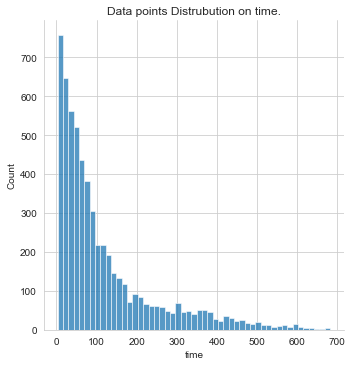

In [21]:
plt.figure(figsize=(16, 6))
sns.displot(data['time'])
plt.title('Data points Distrubution on time.')



In [ ]:
data = data.filter(['activityrecognition_1','accelerometer_mean','accelerometer_min','accelerometer_max','accelerometer_std',
                     'gyroscope_mean', 'gyroscope_min','gyroscope_max','gyroscope_std',
                     'sound_mean', 'sound_min', 'sound_max','sound_std', 'target','user'])

data

In [ ]:
data.isnull().sum()

In [22]:
df1 = data.groupby(['user'], as_index=False)['gyroscope_mean'].mean()
df1

,user,gyroscope_mean
0,0.0,0.300507
1,1.0,0.219100
2,2.0,0.071003
3,3.0,0.315198
4,4.0,0.131513
5,5.0,0.551535
6,6.0,0.537918
7,7.0,NaN
8,8.0,0.803660
9,9.0,NaN


In [ ]:
for i in data.columns[2:]:
    cnt = data[f'{i}'].isnull().sum()
    if cnt>0:
        mn = data[f'{i}'].mean()
        data[f'{i}'] = data[f'{i}'].fillna(mn)
        
        


In [ ]:
data_test = data.iloc[:2500, :]
data_train = data.iloc[2500: , :]

In [ ]:
data_train['target']= data_train['target'].apply({'Bus':0, 'Car':1, 'Still':2, 'Train':3, 'Walking':4}.get)
data_test['target']= data_test['target'].apply({'Bus':0, 'Car':1, 'Still':2, 'Train':3, 'Walking':4}.get)

In [ ]:
#### Training sets
x_train = data_train.iloc[:,:66]
y_train = data_train.iloc[:, 66:]

#### Testing sets
x_test = data_test.iloc[:, :66]
y_test = data_test.iloc[:, 66:]